# Pop albums
## An Exploratory Data Analysis and Modeling
### Data scraped from Spotify (Studio Albums)

In [2]:
# Importing libraries
import pandas as pd 
import numpy as np 

In [3]:
# Read data from CSV file
df = pd.read_csv("pop.csv")

In [4]:
df.shape

(1124, 23)

In [5]:
print(df['Artists'].head(10))

0                                        Madonna
1                                        Madonna
2                                        Madonna
3                                        Madonna
4                                        Madonna
5                                        Madonna
6                                        Madonna
7    Madonna, Jay Mark, John "Jellybean" Benitez
8                                        Madonna
9                                        Madonna
Name: Artists, dtype: object


- On Column Artits, I am removing any collabortators Artists Name after the name of the main Artist.
- Arists Name example on a track: Madonna, Jay Mark, John "Jellybean" Benitez OR Ariana Grance, Nicki Minaj
- Removing text after , example: , Jay Mark, John "Jellybean" AND , Nicki Minaj

In [6]:
# Read data from CSV file
df = pd.read_csv("pop.csv")

# Remove everything after the first comma in the 'Artists' column
df['Artists'] = df['Artists'].str.split(',').str[0]

- Checking data types and column names

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1124 non-null   object 
 1   Artists           1124 non-null   object 
 2   Album             1124 non-null   object 
 3   Release Date      1124 non-null   object 
 4   Popularity Score  1124 non-null   int64  
 5   danceability      1124 non-null   float64
 6   energy            1124 non-null   float64
 7   key               1124 non-null   int64  
 8   loudness          1124 non-null   float64
 9   mode              1124 non-null   int64  
 10  speechiness       1124 non-null   float64
 11  acousticness      1124 non-null   float64
 12  instrumentalness  1124 non-null   float64
 13  liveness          1124 non-null   float64
 14  valence           1124 non-null   float64
 15  tempo             1124 non-null   float64
 16  type              1124 non-null   object 


- No nulls
- Also, advice. #df['album_release_date'] = pd.to_datetime(df['album_release_date'], format='mixed')
- Add , format='mixed') to the code if the data is mixed
- I have some mixed ones on other genre CSV's files.

In [8]:
# Converting Release Date (Object Dtype) column to datetime Dtype
df['Release Date'] = pd.to_datetime(df['Release Date'])

- Creating it's own column to treat them as unique column for the models.

In [9]:
# Extract numerical features from datetime columns
df['Release Day'] = df['Release Date'].dt.day
df['Release Month'] = df['Release Date'].dt.month
df['Release Year'] = df['Release Date'].dt.year

- Turning miliseconds into minutes to be easy readable 

In [10]:
# milliseconds into minutes
df['duration_minutes'] = df['duration_ms'] / 60000

In [11]:
#Removing duration_ms column
df.drop(columns=['duration_ms'], inplace=True)

In [12]:
df.head()

Name  Artists    Album Release Date  \
0                       Holiday  Madonna  Madonna   1983-07-27   
1                    Lucky Star  Madonna  Madonna   1983-07-27   
2                    Borderline  Madonna  Madonna   1983-07-27   
3                    Burning Up  Madonna  Madonna   1983-07-27   
4  Everybody - Original Version  Madonna  Madonna   1983-07-27   

   Popularity Score  danceability  energy  key  loudness  mode  ...  \
0                63         0.813   0.699    7    -8.656     1  ...   
1                56         0.793   0.627    4   -10.599     0  ...   
2                49         0.787   0.526    9   -12.692     1  ...   
3                47         0.869   0.738    6    -4.566     0  ...   
4                42         0.921   0.782    9    -4.998     0  ...   

             type                      id  \
0  audio_features  3ibAzRj9JnowdoLkyllk3n   
1  audio_features  2hWI9GNr3kBrxZ7Mphho4Q   
2  audio_features  4SuabhTNPBTBFjfOjhvRNQ   
3  audio_features  48YZhmKL3aZKhQUfpvkelu   
4  audio_features  4sFGkok98Cu0gu52fD48Xr   

                                    uri  \
0  spotify:track:3ibAzRj9JnowdoLkyllk3n   
1  spotify:track:2hWI9GNr3kBrxZ7Mphho4Q   
2  spotify:track:4SuabhTNPBTBFjfOjhvRNQ   
3  spotify:track:48YZhmKL3aZKhQUfpvkelu   
4  spotify:track:4sFGkok98Cu0gu52fD48Xr   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/3ibAzRj9Jnow...   
1  https://api.spotify.com/v1/tracks/2hWI9GNr3kBr...   
2  https://api.spotify.com/v1/tracks/4SuabhTNPBTB...   
3  https://api.spotify.com/v1/tracks/48YZhmKL3aZK...   
4  https://api.spotify.com/v1/tracks/4sFGkok98Cu0...   

                                        analysis_url  time_signature  \
0  https://api.spotify.com/v1/audio-analysis/3ibA...               4   
1  https://api.spotify.com/v1/audio-analysis/2hWI...               4   
2  https://api.spotify.com/v1/audio-analysis/4Sua...               4   
3  https://api.spotify.com/v1/audio-analysis/48YZ...               4   
4  https://api.spotify.com/v1/audio-analysis/4sFG...               4   

  Release Day Release Month Release Year duration_minutes  
0          27             7         1983         3.859333  
1          27             7         1983         5.562883  
2          27             7         1983         6.950667  
3          27             7         1983         3.755550  
4          27             7         1983         6.039783  

[5 rows x 26 columns]

In [13]:
# To see album names
# set(df['Album'])

In [14]:
df['Artists'].value_counts()

Artists
Madonna           213
Ariana Grande     183
Rihanna           159
Britney Spears    146
Taylor Swift      146
Lady Gaga         101
Katy Perry         90
Beyoncé            86
Name: count, dtype: int64

- Some Albums below with more than 20 songs does not sound right

In [15]:
df['Album'].value_counts()

Album
Glory (Deluxe)           46
Dangerous Woman          39
MDNA (Deluxe Version)    34
RENAISSANCE              32
evermore                 30
                         ..
Music                    10
Madonna                  10
1989                      8
Red                       6
Rebel Heart               2
Name: count, Length: 61, dtype: int64

- Checking if the album Renaissance is duplicated

In [16]:
# Filter the DataFrame to get only rows with 'Album' column equal to 'RENAISSANCE'
renaissance_rows = df[df['Album'] == 'RENAISSANCE']

# Extract the 'Name' and 'Popularity Score' columns from the filtered rows
renaissance_info = renaissance_rows[['Name', 'Popularity Score']]

# Print the filtered DataFrame with 'Name' and 'Popularity Score' columns
print("Information for the 'RENAISSANCE' album:")
print(renaissance_info)

Information for the 'RENAISSANCE' album:
                                Name  Popularity Score
267                          CUFF IT                81
268              ENERGY (feat. Beam)                73
269                    BREAK MY SOUL                73
270            AMERICA HAS A PROBLEM                71
271                  ALIEN SUPERSTAR                73
272                           HEATED                72
273                    I'M THAT GIRL                70
274                             COZY                70
275                       PURE/HONEY                69
276                   VIRGO'S GROOVE                67
277                      CHURCH GIRL                67
278  MOVE (feat. Grace Jones & Tems)                67
279             PLASTIC OFF THE SOFA                66
280                           THIQUE                66
281               SUMMER RENAISSANCE                67
282              ALL UP IN YOUR MIND                65
283                     

- It's duplicated !
- In the web scraping Jupyter Notebook I only requested web scraping for Beyonce's Renaissance studio album, (once),
  it gave me the album twice, I have duplicated songs, I don't know why, sometimes web scraping fails.
- Note that the duplicate albums have different popularity scores.
- My theory, perhaps is that sometimes there is an explicit and non-explicit version of the same studio album,
  depending on whether your account is of legal age or not, but I don't know if because it gave me the album twice.
- So in order not to affect my analysis, I will eliminate the album with the lowest average popularity.

In [17]:
# Sort the DataFrame by 'Popularity Score' in descending order
df_sorted = df.sort_values(by='Popularity Score', ascending=False)

# Drop duplicates in the 'Name' column, keeping the first occurrence (highest popularity score)
df_unique = df_sorted.drop_duplicates(subset='Name', keep='first')

# Reset index to ensure the DataFrame index is sequential
df_unique = df_unique.reset_index(drop=True)

# Display the resulting DataFrame without duplicate 'Name' entries
print(df_unique)

                                           Name        Artists  \
0                                  Cruel Summer   Taylor Swift   
1      we can't be friends (wait for your love)  Ariana Grande   
2                                         Lover   Taylor Swift   
3                                     Anti-Hero   Taylor Swift   
4                               the boy is mine  Ariana Grande   
..                                          ...            ...   
812                             Jewels N' *****      Lady Gaga   
813            Bedtime Story - Luscious Dub Mix        Madonna   
814  Bedtime Story - Junior's Sound Factory Dub        Madonna   
815                           Beyoncé Interlude        Beyoncé   
816              Bedtime Story - Percapella Mix        Madonna   

                   Album Release Date  Popularity Score  danceability  energy  \
0                  Lover   2019-08-23                96         0.552  0.7020   
1       eternal sunshine   2024-03-08        

In [18]:
# Check for duplicates in the 'Name' column
# duplicates = df.duplicated('Name')

# Print rows where duplicates exist
# print(df[duplicates].head())

In [19]:
df['Album'].value_counts()

Album
Glory (Deluxe)           46
Dangerous Woman          39
MDNA (Deluxe Version)    34
RENAISSANCE              32
evermore                 30
                         ..
Music                    10
Madonna                  10
1989                      8
Red                       6
Rebel Heart               2
Name: count, Length: 61, dtype: int64

In [20]:
df_unique['Album'].value_counts()

Album
Glory (Deluxe)           23
Erotica                  19
Lover                    18
MDNA (Deluxe Version)    18
Dangerous Woman          17
                         ..
Like a Virgin            10
Music                    10
1989                      8
Red                       6
Rebel Heart               2
Name: count, Length: 61, dtype: int64

- Now without duplicates, this amount of songs per album make sense.

In [21]:
# Group by 'Artists' and count the number of unique albums for each artist
albums_per_artist = df_unique.groupby('Artists')['Album'].nunique()

# Calculate the average number of albums per artist
average_albums_per_artist = albums_per_artist.mean()

print("Average number of albums per artist:", average_albums_per_artist)

Average number of albums per artist: 7.625


In [22]:
df_unique.shape

(817, 26)

In [23]:
# Rename column 'Popularity Score' to 'popularity' so it matches my audio features by just having single words on columns
df_unique = df_unique.rename(columns={'Popularity Score': 'popularity'})

# Display the DataFrame with the renamed column
print("\nDataFrame with Renamed Column:")
print(df_unique)


DataFrame with Renamed Column:
                                           Name        Artists  \
0                                  Cruel Summer   Taylor Swift   
1      we can't be friends (wait for your love)  Ariana Grande   
2                                         Lover   Taylor Swift   
3                                     Anti-Hero   Taylor Swift   
4                               the boy is mine  Ariana Grande   
..                                          ...            ...   
812                             Jewels N' *****      Lady Gaga   
813            Bedtime Story - Luscious Dub Mix        Madonna   
814  Bedtime Story - Junior's Sound Factory Dub        Madonna   
815                           Beyoncé Interlude        Beyoncé   
816              Bedtime Story - Percapella Mix        Madonna   

                   Album Release Date  popularity  danceability  energy  key  \
0                  Lover   2019-08-23          96         0.552  0.7020    9   
1       eternal

In [24]:
# Checking averages on my numerical colums
mean_values_of_features = df_unique.groupby('Artists')[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
                                                 'speechiness', 'acousticness', 'instrumentalness',
                                                 'liveness', 'valence', 'tempo', 'duration_minutes',
                                                 'time_signature', 'Release Day', 'Release Month',
                                                 'Release Year']].mean()
print(mean_values_of_features)

                popularity  danceability    energy       key  loudness  \
Artists                                                                  
Ariana Grande    66.916667      0.633229  0.585740  5.156250 -6.213750   
Beyoncé          60.438596      0.621947  0.575670  4.789474 -8.167614   
Britney Spears   45.614754      0.698893  0.716705  5.844262 -5.682820   
Katy Perry       50.343750      0.627188  0.705594  4.937500 -5.384641   
Lady Gaga        51.160000      0.655613  0.745480  4.506667 -5.525547   
Madonna          35.105882      0.689924  0.666711  5.629412 -8.553606   
Rihanna          45.627451      0.610755  0.653000  5.558824 -5.973539   
Taylor Swift     68.374046      0.596344  0.564122  4.816794 -7.581160   

                    mode  speechiness  acousticness  instrumentalness  \
Artists                                                                 
Ariana Grande   0.593750     0.090643      0.273600          0.000588   
Beyoncé         0.701754     0.148965   

- loudness has negative values, but is normal

In [25]:
mean_values_of_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Ariana Grande to Taylor Swift
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        8 non-null      float64
 1   danceability      8 non-null      float64
 2   energy            8 non-null      float64
 3   key               8 non-null      float64
 4   loudness          8 non-null      float64
 5   mode              8 non-null      float64
 6   speechiness       8 non-null      float64
 7   acousticness      8 non-null      float64
 8   instrumentalness  8 non-null      float64
 9   liveness          8 non-null      float64
 10  valence           8 non-null      float64
 11  tempo             8 non-null      float64
 12  duration_minutes  8 non-null      float64
 13  time_signature    8 non-null      float64
 14  Release Day       8 non-null      float64
 15  Release Month     8 non-null      float64
 16  Release Year      8 non-null  

- 8 nulls

# POP VISUALS

In [26]:
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats

### Checking for outliers in popularity
- Because popularity is my target of what I want to see if you can predict considering audio features.

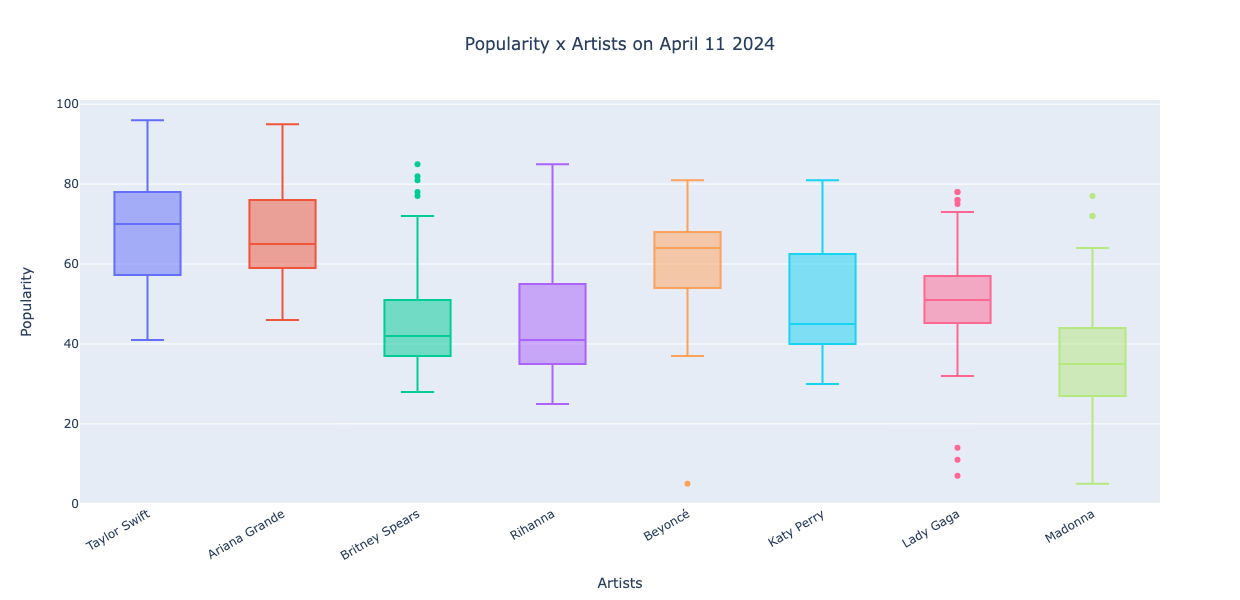

In [27]:
# Box plot
box_plot = px.box(df_unique, x='Artists', y='popularity', color='Artists',
                  title='Popularity x Artists on April 11 2024',
                  labels={'Artists': 'Artists', 'popularity': 'Popularity'}) # second is the label

# Update layout
box_plot.update_layout(
    showlegend=False, 
    height=600, 
    width=1200,  
    title_x=0.5  # Center title
)

# Rotate x-axis tick labels diagonally
box_plot.update_layout(
    xaxis=dict(
        tickangle=-30,
        tickmode='array',
        tickvals=list(range(len(df_unique['Artists'].unique()))),
        ticktext=list(df_unique['Artists'].unique())
    )
)

# Show the box plot
box_plot.show()

- The outliers from Beyonce and Lady Gaga are more drastic, so for sure I should remove those ones because they are far from the minimin.
- The outliers of Britney Spears and Gaga and Madonna on the top, near the maximun are not to drastic. I will leave them.

In [28]:
df_unique.shape

(817, 26)

In [29]:
# Define the conditions for removing outliers for each artist
beyonce_condition = (df_unique['Artists'] == 'Beyoncé') & (df_unique['popularity'] < 10)
lady_gaga_condition = (df_unique['Artists'] == 'Lady Gaga') & (df_unique['popularity'] < 20)

# Apply the conditions to filter the DataFrame
df_cleaned = df_unique[~(beyonce_condition | lady_gaga_condition)]

# Optionally, reset index if needed
df_cleaned = df_cleaned.reset_index(drop=True)

In [30]:
df_cleaned.shape

(813, 26)

- Below, I will visualize mean/average number of audio features per pop artist. Just for the purpose of seeing the data in a different way, visually, and for practice.

In [31]:
# Now without outliers in popularity, I am checking averages again on my numerical colums
mean_values_of_features2 = df_cleaned.groupby('Artists')[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
                                                 'speechiness', 'acousticness', 'instrumentalness',
                                                 'liveness', 'valence', 'tempo', 'duration_minutes',
                                                 'time_signature', 'Release Day', 'Release Month',
                                                 'Release Year']].mean()
print(mean_values_of_features2)

                popularity  danceability    energy       key  loudness  \
Artists                                                                  
Ariana Grande    66.916667      0.633229  0.585740  5.156250 -6.213750   
Beyoncé          61.428571      0.621446  0.585143  4.875000 -7.941071   
Britney Spears   45.614754      0.698893  0.716705  5.844262 -5.682820   
Katy Perry       50.343750      0.627188  0.705594  4.937500 -5.384641   
Lady Gaga        52.847222      0.656639  0.748917  4.486111 -5.462639   
Madonna          35.105882      0.689924  0.666711  5.629412 -8.553606   
Rihanna          45.627451      0.610755  0.653000  5.558824 -5.973539   
Taylor Swift     68.374046      0.596344  0.564122  4.816794 -7.581160   

                    mode  speechiness  acousticness  instrumentalness  \
Artists                                                                 
Ariana Grande   0.593750     0.090643      0.273600          0.000588   
Beyoncé         0.696429     0.139125   

# POPULARITY VISUAL

Mean values of features sorted in descending order:
Artists
Taylor Swift      68.374046
Ariana Grande     66.916667
Beyoncé           61.428571
Lady Gaga         52.847222
Katy Perry        50.343750
Rihanna           45.627451
Britney Spears    45.614754
Madonna           35.105882
Name: popularity, dtype: float64


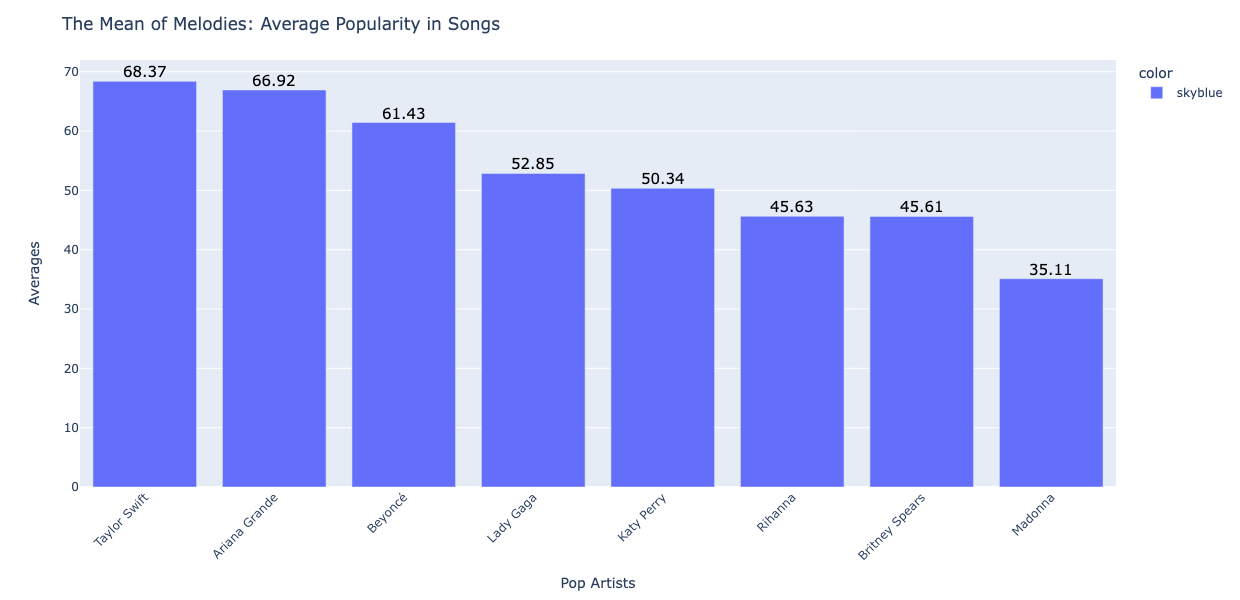

In [32]:
# Sort the average/mean values in descending order
sorted_mean_values_for_popularity = mean_values_of_features2.sort_values('popularity',ascending=False)

print("Mean values of features sorted in descending order:")
print(sorted_mean_values_for_popularity['popularity'])


# Extracting the sorted mean values for 'popularity'
popularity_mean_sorted = sorted_mean_values_for_popularity['popularity']


# Define colors for the bars
colors = ['skyblue' if x != 'popularity' else 'salmon' for x in popularity_mean_sorted.index]

# Create a bar chart using the sorted mean values for 'popularity'
fig = px.bar(x=popularity_mean_sorted.index, y=popularity_mean_sorted, color=colors)

# Add labels and title
fig.update_layout(
    xaxis_title='Pop Artists',
    yaxis_title='Averages',
    title='The Mean of Melodies: Average Popularity in Songs',
    xaxis_tickangle= -45,  # Rotate x-axis labels for better visibility
    height=600,  # Adjust the height of the chart
    width=1200    # Adjust the width of the chart
    
)

# Add labels for the percentage on top of each bar
for i, mean_value in enumerate(popularity_mean_sorted):
    fig.add_annotation(
        x=popularity_mean_sorted.index[i],
        y=mean_value,
        text=f'{mean_value:.2f}',
        font=dict(color='black', size=15), #change size of percentage
        showarrow=False,
        yshift=10 #change distance between bar and % number
    )

# Show plot
fig.show()

# DANCEABILITY

Mean values of features sorted in descending order:
Artists
Britney Spears    0.698893
Madonna           0.689924
Lady Gaga         0.656639
Ariana Grande     0.633229
Katy Perry        0.627188
Beyoncé           0.621446
Rihanna           0.610755
Taylor Swift      0.596344
Name: danceability, dtype: float64


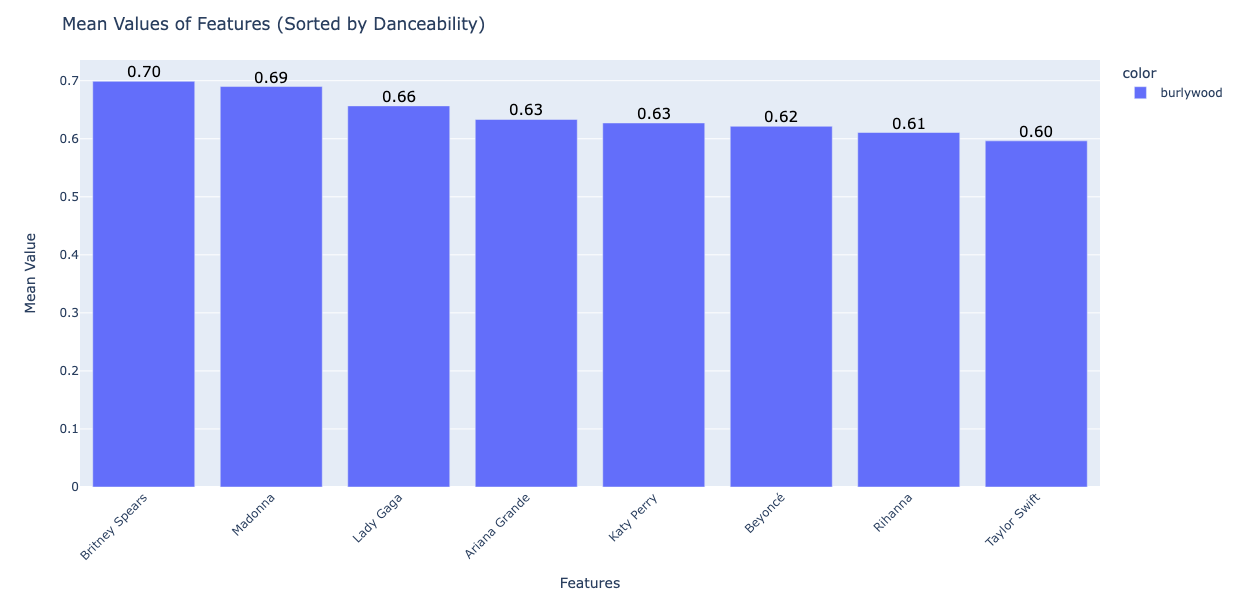

In [34]:
# Sort the average/mean values in descending order
sorted_mean_values_for_dancebility = mean_values_of_features2.sort_values('danceability',ascending=False)

print("Mean values of features sorted in descending order:")
print(sorted_mean_values_for_dancebility['danceability'])

# Extracting the sorted mean values for 'danceability'
danceability_mean_sorted = sorted_mean_values_for_dancebility['danceability']

# Define colors for the bars
colors = ['burlywood' if x != 'danceability' else 'salmon' for x in danceability_mean_sorted.index]

# Create a bar chart using the sorted mean values for 'danceability'
fig = px.bar(x=danceability_mean_sorted.index, y=danceability_mean_sorted, color=colors)

# Add labels and title
fig.update_layout(
    xaxis_title='Features',
    yaxis_title='Mean Value',
    title='Mean Values of Features (Sorted by Danceability)',
    xaxis_tickangle= -45,  # Rotate x-axis labels for better visibility
    height=600,  # Adjust the height of the chart
    width=1200    # Adjust the width of the chart
    
)

# Add labels for the percentage on top of each bar
for i, mean_value in enumerate(danceability_mean_sorted):
    fig.add_annotation(
        x=danceability_mean_sorted.index[i],
        y=mean_value,
        text=f'{mean_value:.2f}',
        font=dict(color='black', size=15), #change size of percentage # this color is for % #
        showarrow=False,
        yshift=10 #change distance between bar and % number
    )

# Show plot
fig.show()

# ENERGY

Mean values of features sorted in descending order:
Artists
Lady Gaga         0.748917
Britney Spears    0.716705
Katy Perry        0.705594
Madonna           0.666711
Rihanna           0.653000
Ariana Grande     0.585740
Beyoncé           0.585143
Taylor Swift      0.564122
Name: energy, dtype: float64


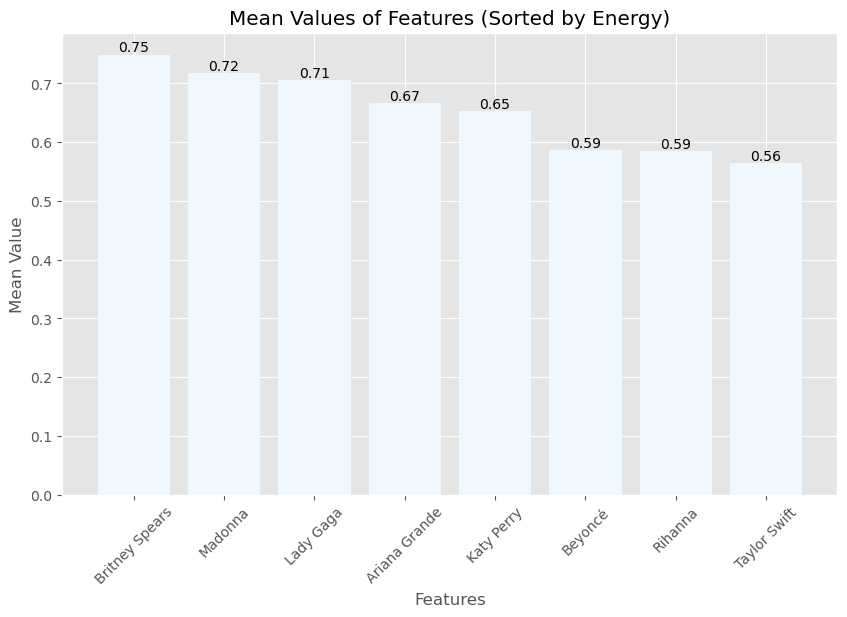

In [35]:
# Sort the average/mean values in descending order
sorted_mean_values_for_energy = mean_values_of_features2.sort_values('energy',ascending=False)

print("Mean values of features sorted in descending order:")
print(sorted_mean_values_for_energy['energy'])



# Extracting the sorted mean values for ' '
energy_mean_sorted = sorted_mean_values_for_energy['energy']

# Define colors for the bars
colors = ['aliceblue' if x != 'energy' else 'salmon' for x in energy_mean_sorted.index]

# Create a bar chart using the sorted mean values for ' '
plt.figure(figsize=(10, 6))
bars = plt.bar(danceability_mean_sorted.index, energy_mean_sorted, color=colors)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values of Features (Sorted by Energy)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Add labels with each percent inside each bar plot
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Show plot
plt.show()

# KEY

Mean values of features sorted in descending order:
Artists
Britney Spears    5.844262
Madonna           5.629412
Rihanna           5.558824
Ariana Grande     5.156250
Katy Perry        4.937500
Beyoncé           4.875000
Taylor Swift      4.816794
Lady Gaga         4.486111
Name: key, dtype: float64


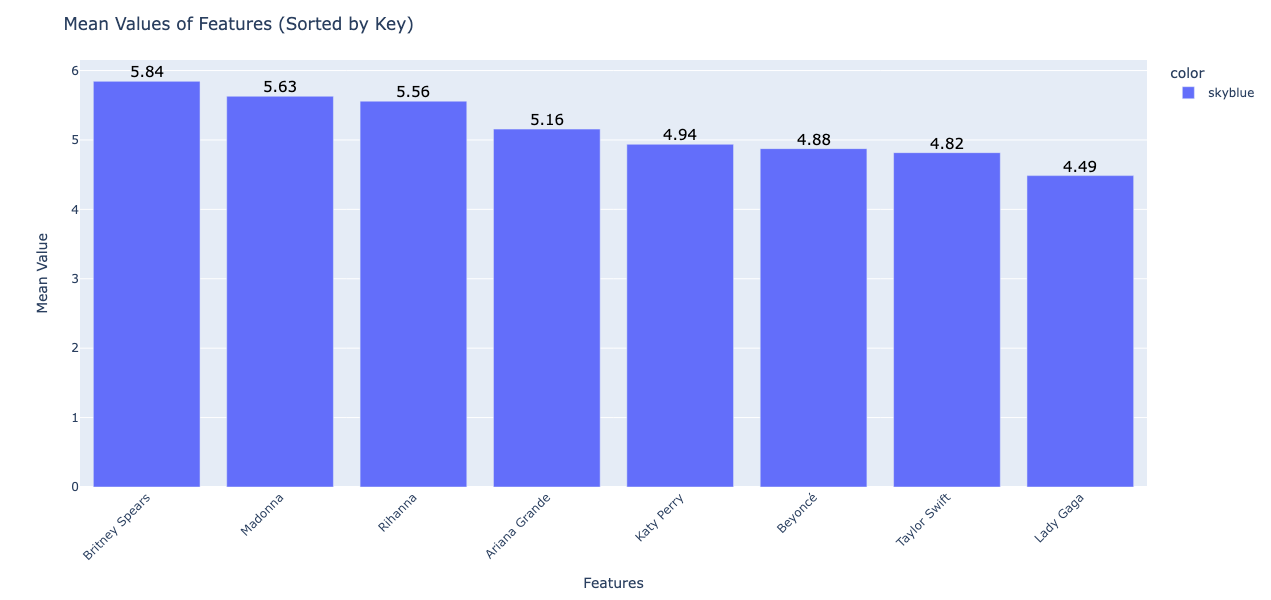

In [36]:
# Sort the average/mean values in descending order
sorted_mean_values_for_key = mean_values_of_features2.sort_values('key',ascending=False)

print("Mean values of features sorted in descending order:")
print(sorted_mean_values_for_key['key'])


# Extracting the sorted mean values for 'key'
key_mean_sorted = sorted_mean_values_for_key['key']


# Define colors for the bars
colors = ['skyblue' if x != 'key' else 'salmon' for x in key_mean_sorted.index]

# Create a bar chart using the sorted mean values for 'key'
fig = px.bar(x=key_mean_sorted.index, y=key_mean_sorted, color=colors)

# Add labels and title
fig.update_layout(
    xaxis_title='Features',
    yaxis_title='Mean Value',
    title='Mean Values of Features (Sorted by Key)',
    xaxis_tickangle= -45,  # Rotate x-axis labels for better visibility
    height=600,  # Adjust the height of the chart
    width=1200    # Adjust the width of the chart
    
)

# Add labels for the percentage on top of each bar
for i, mean_value in enumerate(key_mean_sorted):
    fig.add_annotation(
        x=key_mean_sorted.index[i],
        y=mean_value,
        text=f'{mean_value:.2f}',
        font=dict(color='black', size=15), #change size of percentage
        showarrow=False,
        yshift=10 #change distance between bar and % number
    )

# Show plot
fig.show()

# LOUDNESS

Mean values of features sorted in descending order:
Artists
Katy Perry       -5.384641
Lady Gaga        -5.462639
Britney Spears   -5.682820
Rihanna          -5.973539
Ariana Grande    -6.213750
Taylor Swift     -7.581160
Beyoncé          -7.941071
Madonna          -8.553606
Name: loudness, dtype: float64


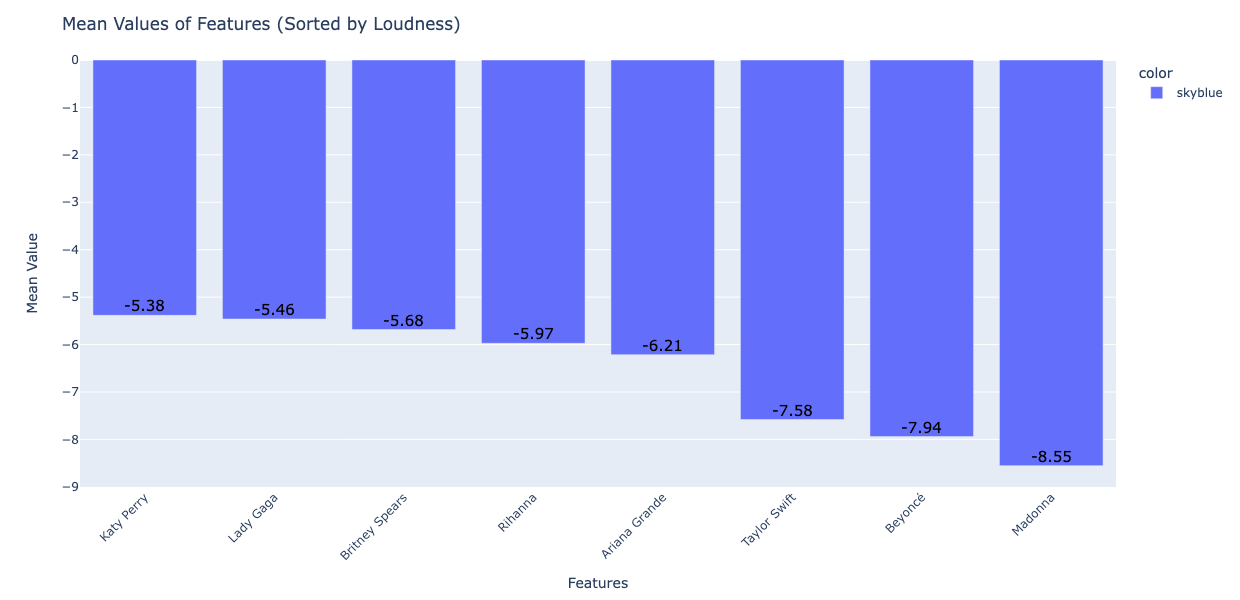

In [37]:
# Sort the average/mean values in descending order
sorted_mean_values_for_loudness = mean_values_of_features2.sort_values('loudness',ascending=False)

print("Mean values of features sorted in descending order:")
print(sorted_mean_values_for_loudness['loudness'])


# Extracting the sorted mean values for 'loudness'
loudness_mean_sorted = sorted_mean_values_for_loudness['loudness']


# Define colors for the bars
colors = ['skyblue' if x != 'loudness' else 'salmon' for x in loudness_mean_sorted.index]

# Create a bar chart using the sorted mean values for 'loudness'
fig = px.bar(x=loudness_mean_sorted.index, y=loudness_mean_sorted, color=colors)

# Add labels and title
fig.update_layout(
    xaxis_title='Features',
    yaxis_title='Mean Value',
    title='Mean Values of Features (Sorted by Loudness)',
    xaxis_tickangle= -45,  # Rotate x-axis labels for better visibility
    height=600,  # Adjust the height of the chart
    width=1200    # Adjust the width of the chart
    
)

# Add labels for the percentage on top of each bar
for i, mean_value in enumerate(loudness_mean_sorted):
    fig.add_annotation(
        x=loudness_mean_sorted.index[i],
        y=mean_value,
        text=f'{mean_value:.2f}',
        font=dict(color='black', size=15), #change size of percentage
        showarrow=False,
        yshift=10 #change distance between bar and % number
    )

# Show plot
fig.show()

# MODE

Mean values of features sorted in descending order:
Artists
Taylor Swift      0.885496
Beyoncé           0.696429
Katy Perry        0.671875
Lady Gaga         0.625000
Ariana Grande     0.593750
Rihanna           0.549020
Madonna           0.494118
Britney Spears    0.483607
Name: mode, dtype: float64


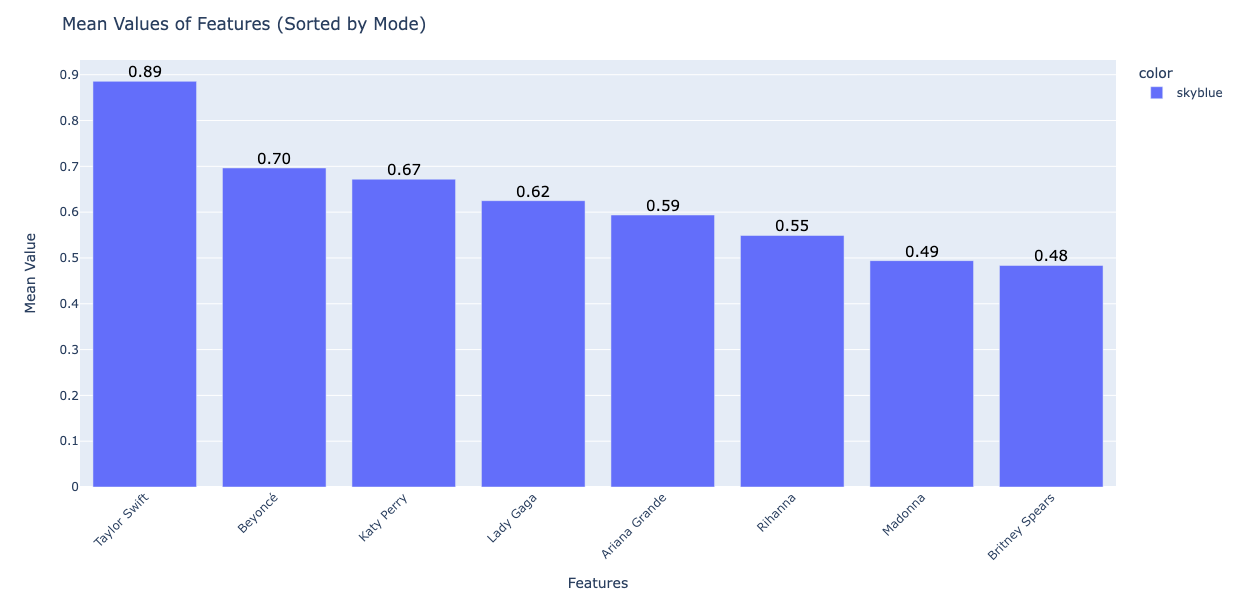

In [38]:
# Sort the average/mean values in descending order
sorted_mean_values_for_mode = mean_values_of_features2.sort_values('mode',ascending=False)

print("Mean values of features sorted in descending order:")
print(sorted_mean_values_for_mode['mode'])


# Extracting the sorted mean values for 'mode'
mode_mean_sorted = sorted_mean_values_for_mode['mode']


# Define colors for the bars
colors = ['skyblue' if x != 'mode' else 'salmon' for x in mode_mean_sorted.index]

# Create a bar chart using the sorted mean values for 'mode'
fig = px.bar(x=mode_mean_sorted.index, y=mode_mean_sorted, color=colors)

# Add labels and title
fig.update_layout(
    xaxis_title='Features',
    yaxis_title='Mean Value',
    title='Mean Values of Features (Sorted by Mode)',
    xaxis_tickangle= -45,  # Rotate x-axis labels for better visibility
    height=600,  # Adjust the height of the chart
    width=1200    # Adjust the width of the chart
    
)

# Add labels for the percentage on top of each bar
for i, mean_value in enumerate(mode_mean_sorted):
    fig.add_annotation(
        x=mode_mean_sorted.index[i],
        y=mean_value,
        text=f'{mean_value:.2f}',
        font=dict(color='black', size=15), #change size of percentage
        showarrow=False,
        yshift=10 #change distance between bar and % number
    )

# Show plot
fig.show()

# SPEECHINESS

Mean values of features sorted in descending order:
Artists
Beyoncé           0.139125
Ariana Grande     0.090643
Rihanna           0.083745
Britney Spears    0.070623
Taylor Swift      0.063879
Lady Gaga         0.062644
Katy Perry        0.061802
Madonna           0.058887
Name: speechiness, dtype: float64


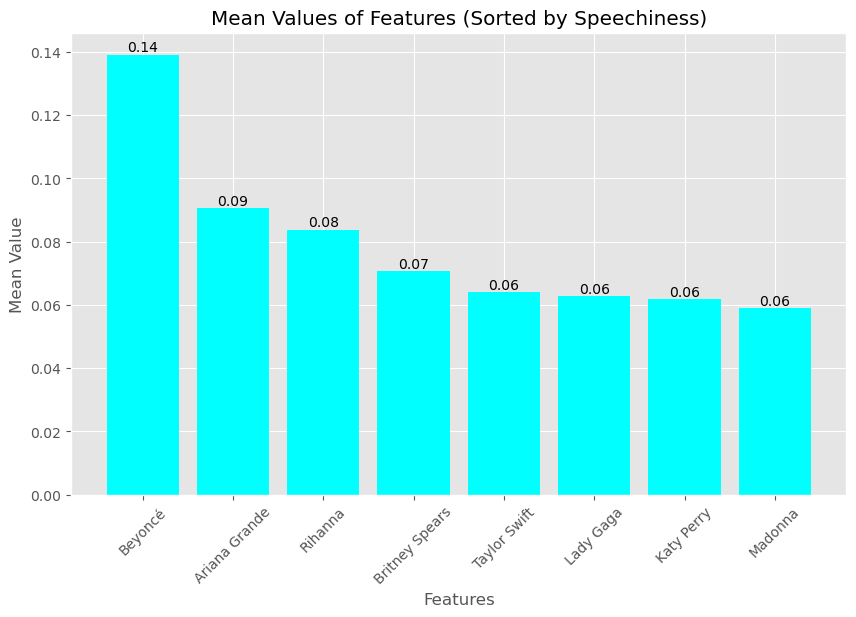

In [39]:
# Sort the average/mean values in descending order
sorted_mean_values_for_speechiness = mean_values_of_features2.sort_values('speechiness', ascending=False)

print("Mean values of features sorted in descending order:")
print(sorted_mean_values_for_speechiness['speechiness'])



# Extracting the sorted mean values for ' speechiness'
speechiness_mean_sorted = sorted_mean_values_for_speechiness['speechiness']

# Define colors for the bars
colors = ['aqua' if x != 'speechiness' else 'salmon' for x in speechiness_mean_sorted.index]

# Create a bar chart using the sorted mean values for 'speechiness '
plt.figure(figsize=(10, 6))
bars = plt.bar(speechiness_mean_sorted.index, speechiness_mean_sorted, color=colors)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values of Features (Sorted by Speechiness)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Add labels with each percent inside each bar plot
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Show plot
plt.show()

# ACOUSTICNESS

Mean values of features sorted in descending order:
Artists
Taylor Swift      0.342897
Ariana Grande     0.273600
Beyoncé           0.199131
Rihanna           0.165958
Britney Spears    0.154302
Madonna           0.152415
Katy Perry        0.121984
Lady Gaga         0.084756
Name: acousticness, dtype: float64


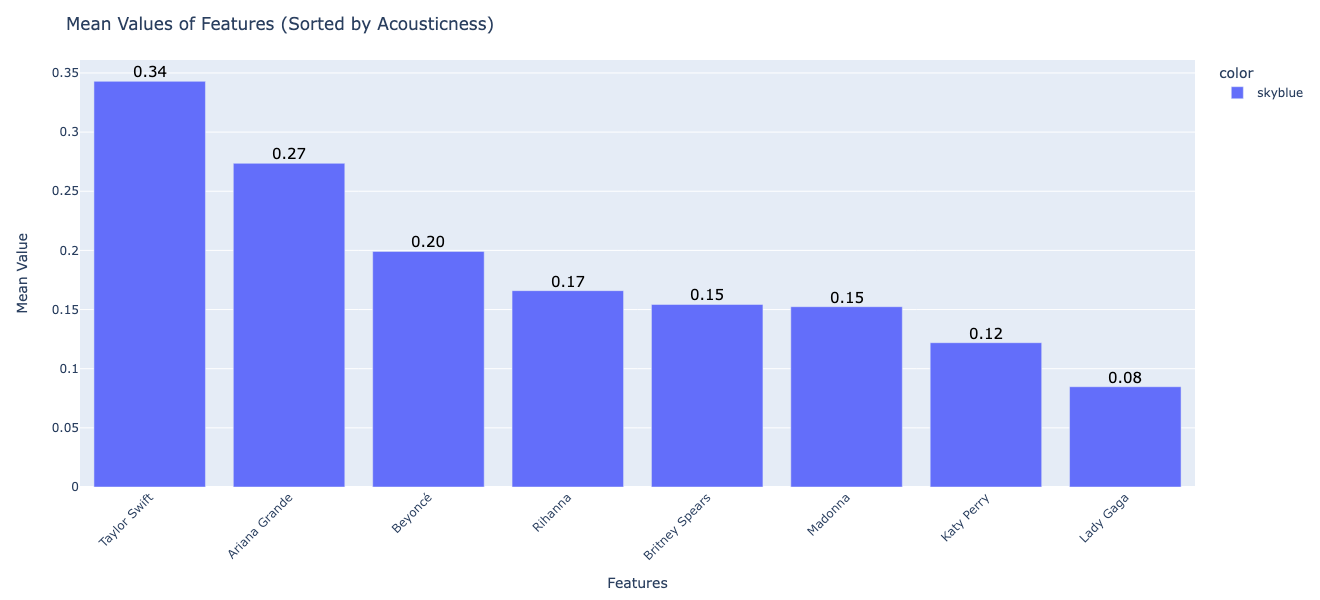

In [40]:
# Sort the average/mean values in descending order
sorted_mean_values_for_acousticness = mean_values_of_features2.sort_values('acousticness',ascending=False)

print("Mean values of features sorted in descending order:")
print(sorted_mean_values_for_acousticness['acousticness'])


# Extracting the sorted mean values for 'acousticness'
acousticness_mean_sorted = sorted_mean_values_for_acousticness['acousticness']


# Define colors for the bars
colors = ['skyblue' if x != 'acousticness' else 'salmon' for x in acousticness_mean_sorted.index]

# Create a bar chart using the sorted mean values for 'acousticness'
fig = px.bar(x=acousticness_mean_sorted.index, y=acousticness_mean_sorted, color=colors)

# Add labels and title
fig.update_layout(
    xaxis_title='Features',
    yaxis_title='Mean Value',
    title='Mean Values of Features (Sorted by Acousticness)',
    xaxis_tickangle= -45,  # Rotate x-axis labels for better visibility
    height=600,  # Adjust the height of the chart
    width=1200    # Adjust the width of the chart
    
)

# Add labels for the percentage on top of each bar
for i, mean_value in enumerate(acousticness_mean_sorted):
    fig.add_annotation(
        x=acousticness_mean_sorted.index[i],
        y=mean_value,
        text=f'{mean_value:.2f}',
        font=dict(color='black', size=15), #change size of percentage
        showarrow=False,
        yshift=10 #change distance between bar and % number
    )

# Show plot
fig.show()

# INSTRUMENTALNESS

Mean values of features sorted in descending order:
Artists
Madonna           0.119738
Lady Gaga         0.029413
Beyoncé           0.014945
Taylor Swift      0.006637
Rihanna           0.002886
Britney Spears    0.002576
Ariana Grande     0.000588
Katy Perry        0.000024
Name: instrumentalness, dtype: float64


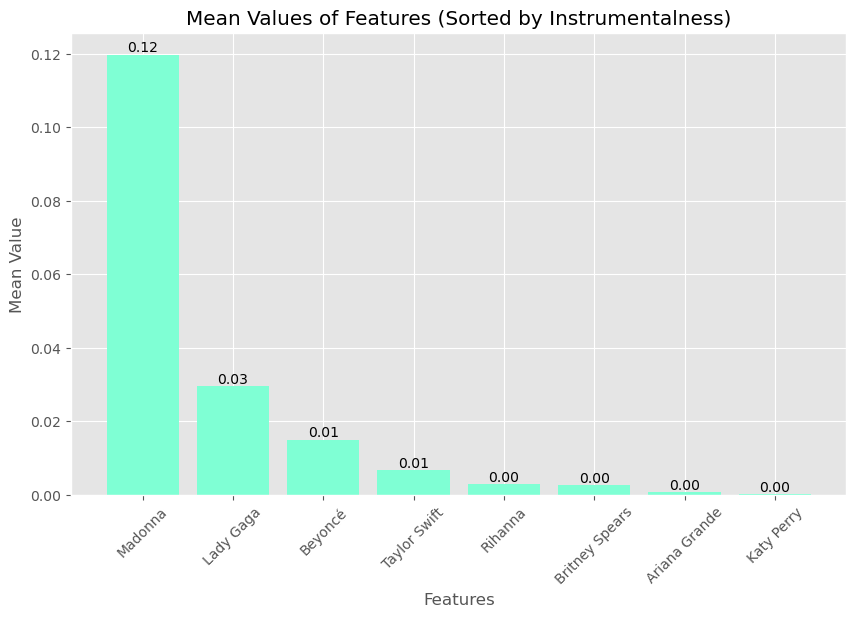

In [41]:
# Sort the average/mean values in descending order
sorted_mean_values_for_instrumentalness = mean_values_of_features2.sort_values('instrumentalness', ascending=False)

print("Mean values of features sorted in descending order:")
print(sorted_mean_values_for_instrumentalness['instrumentalness'])



# Extracting the sorted mean values for 'instrumentalness'
instrumentalness_mean_sorted = sorted_mean_values_for_instrumentalness['instrumentalness']

# Define colors for the bars
colors = ['aquamarine' if x != 'instrumentalness' else 'salmon' for x in instrumentalness_mean_sorted.index]

# Create a bar chart using the sorted mean values for 'instrumentalness'
plt.figure(figsize=(10, 6))
bars = plt.bar(instrumentalness_mean_sorted.index, instrumentalness_mean_sorted, color=colors)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values of Features (Sorted by Instrumentalness)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Add labels with each percent inside each bar plot
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Show plot
plt.show()

# LIVENESS

Mean values of features sorted in descending order by 'liveness':
Artists
Lady Gaga         0.257992
Beyoncé           0.223598
Rihanna           0.175058
Ariana Grande     0.172445
Britney Spears    0.170066
Madonna           0.155301
Katy Perry        0.152633
Taylor Swift      0.141677
Name: liveness, dtype: float64


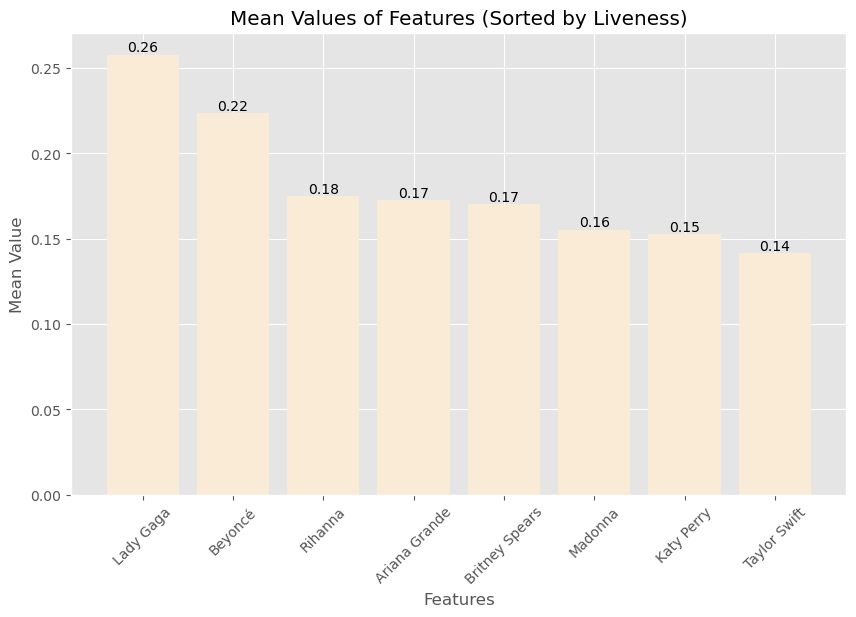

In [42]:
# Sort the average/mean values in descending order by 'liveness'
sorted_mean_values_for_liveness = mean_values_of_features2.sort_values('liveness', ascending=False)

print("Mean values of features sorted in descending order by 'liveness':")
print(sorted_mean_values_for_liveness['liveness'])



# Extracting the sorted mean values for 'liveness'
liveness_mean_sorted = sorted_mean_values_for_liveness['liveness']

# Define colors for the bars
colors = ['antiquewhite' if x != 'liveness' else 'salmon' for x in liveness_mean_sorted.index]

# Create a bar chart using the sorted mean values for 'liveness'
plt.figure(figsize=(10, 6))
bars = plt.bar(liveness_mean_sorted.index, liveness_mean_sorted, color=colors)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values of Features (Sorted by Liveness)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Add labels with each percent inside each bar plot
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Show plot
plt.show()

# VALENCE (HAPPYNESS)

Mean values of features sorted in descending order by 'valence':
Artists
Britney Spears    0.625852
Madonna           0.558309
Lady Gaga         0.524014
Katy Perry        0.499647
Rihanna           0.488740
Beyoncé           0.479230
Ariana Grande     0.434277
Taylor Swift      0.404190
Name: valence, dtype: float64


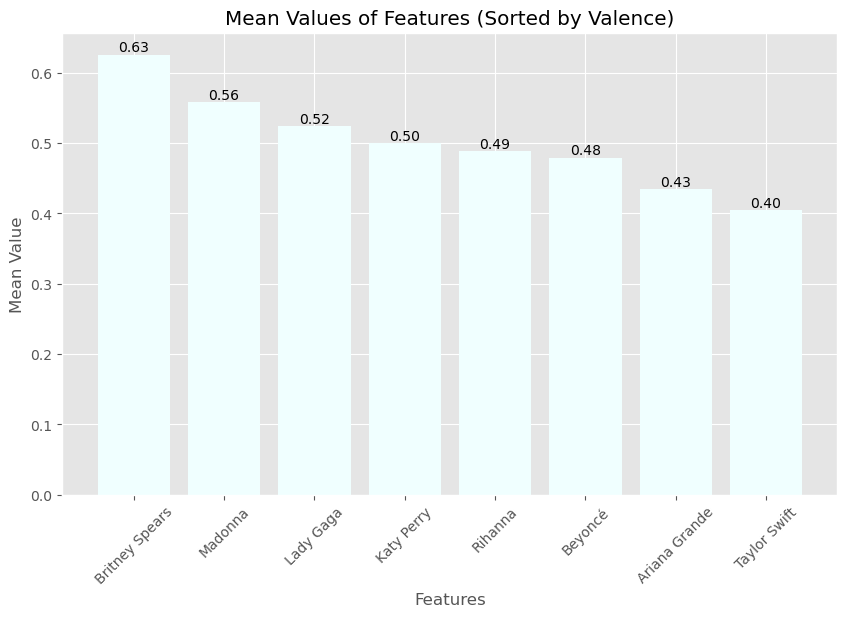

In [43]:
# Sort the average/mean values in descending order by 'valence'
sorted_mean_values_for_valence = mean_values_of_features2.sort_values('valence', ascending=False)

print("Mean values of features sorted in descending order by 'valence':")
print(sorted_mean_values_for_valence['valence'])



# Extracting the sorted mean values for 'valence '
valence_mean_sorted = sorted_mean_values_for_valence['valence']

# Define colors for the bars
colors = ['azure' if x != 'valence' else 'salmon' for x in valence_mean_sorted.index]

# Create a bar chart using the sorted mean values for 'valence'
plt.figure(figsize=(10, 6))
bars = plt.bar(valence_mean_sorted.index, valence_mean_sorted, color=colors)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values of Features (Sorted by Valence)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Add labels with each percent inside each bar plot
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Show plot
plt.show()

# TEMPO

Mean values of features sorted in descending order by 'tempo':
Artists
Katy Perry        125.411438
Lady Gaga         123.295278
Madonna           121.253106
Taylor Swift      120.730618
Rihanna           120.166039
Britney Spears    119.939189
Beyoncé           119.897179
Ariana Grande     114.943750
Name: tempo, dtype: float64


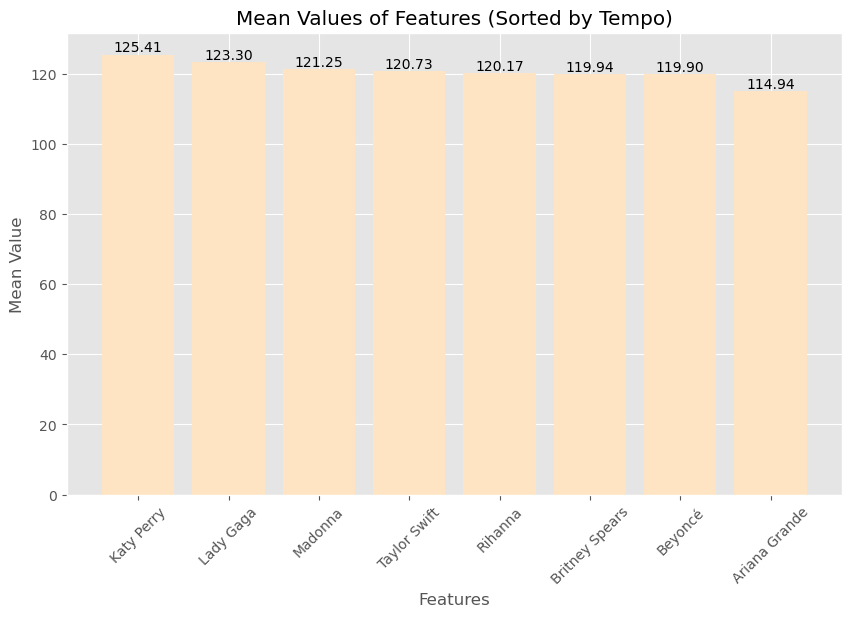

In [44]:
# Sort the average/mean values in descending order by 'tempo'
sorted_mean_values_for_tempo = mean_values_of_features2.sort_values('tempo', ascending=False)

print("Mean values of features sorted in descending order by 'tempo':")
print(sorted_mean_values_for_tempo['tempo'])



# Extracting the sorted mean values for 'tempo'
tempo_mean_sorted = sorted_mean_values_for_tempo['tempo']

# Define colors for the bars
colors = ['bisque' if x != 'tempo' else 'salmon' for x in tempo_mean_sorted.index]

# Create a bar chart using the sorted mean values for 'tempo'
plt.figure(figsize=(10, 6))
bars = plt.bar(tempo_mean_sorted.index, tempo_mean_sorted, color=colors)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values of Features (Sorted by Tempo)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Add labels with each percent inside each bar plot
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Show plot
plt.show()

## Box plots of popularity in artists
- Popularity dated on April 11 of 2024. Date of web scraping from spotify

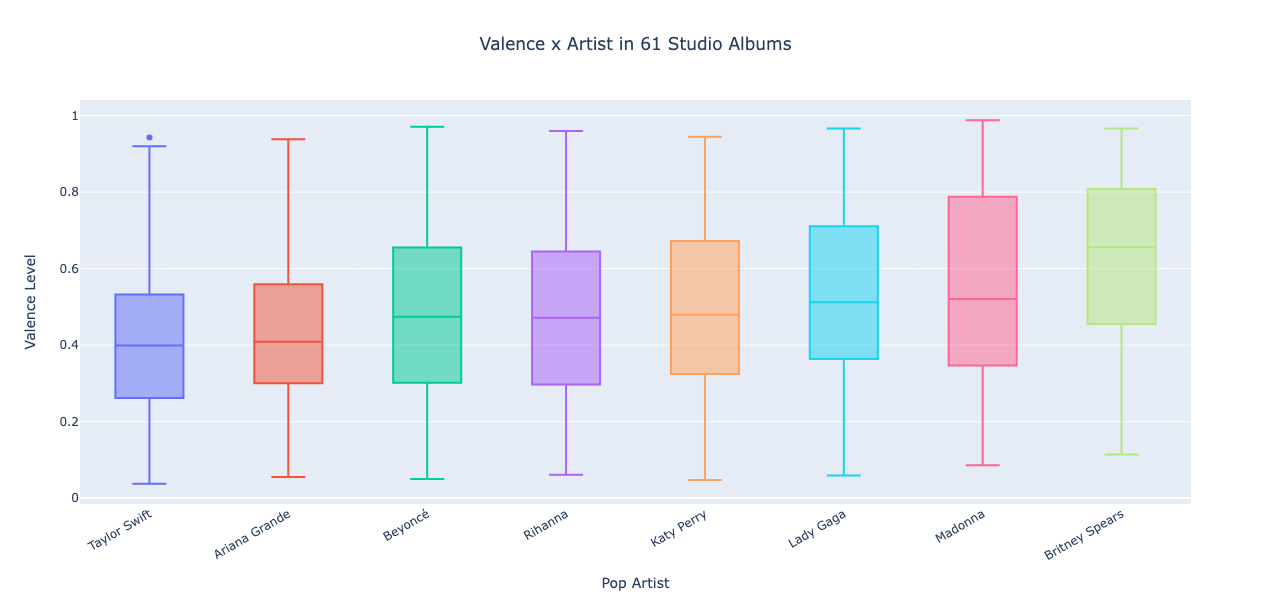

In [45]:
# Define the desired order of artists
artist_order = ['Taylor Swift', 'Ariana Grande', 'Beyoncé', 'Rihanna', 'Katy Perry', 'Lady Gaga', 'Madonna', 'Britney Spears']

# Box plot
box_plot = px.box(df_cleaned, x='Artists', y='valence', color='Artists',
                  title='Valence x Artist in 61 Studio Albums',
                  labels={'Artists': 'Pop Artist', 'valence': 'Valence Level'},
                  category_orders={'Artists': artist_order})

# Update layout
box_plot.update_layout(
    showlegend=False, 
    height=600, 
    width=1200,  
    title_x=0.5  # Center title
)

# Rotate x-axis tick labels diagonally
box_plot.update_layout(
    xaxis=dict(
        tickangle=-30,
        tickmode='array',
        tickvals=list(range(len(artist_order))),
        ticktext=artist_order
    )
)

# Show the box plot
box_plot.show()

## Box plots of valence in artists

- If I have time I want to add photos of faces of the artists on the box plots, for power point slides

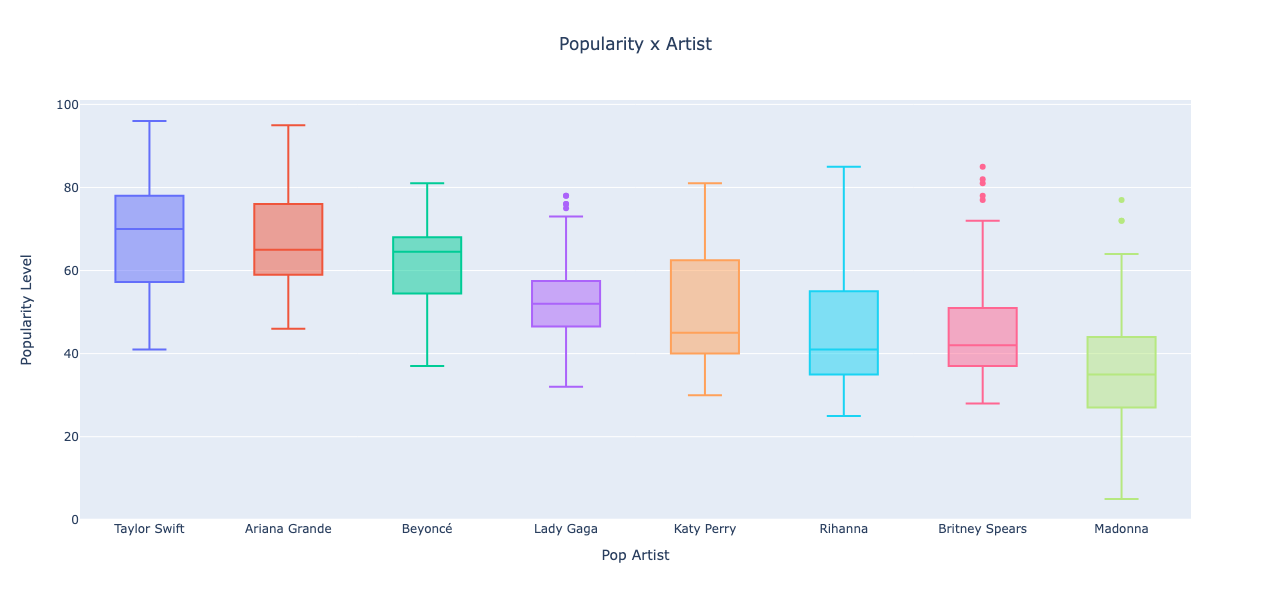

In [46]:
# Define the desired order of artists
artist_order_popularity = ['Taylor Swift', 'Ariana Grande', 'Beyoncé', 'Lady Gaga', 'Katy Perry', 'Rihanna', 'Britney Spears', 'Madonna']

# Box plot
box_plot2 = px.box(df_cleaned, x='Artists', y='popularity', color='Artists',
                  title='Popularity x Artist',
                  labels={'Artists': 'Pop Artist', 'popularity': 'Popularity Level'},
                  category_orders={'Artists': artist_order_popularity})

# Update layout
box_plot2.update_layout(
    showlegend=False, 
    height=600, 
    width=1200,  
    title_x=0.5  # Center title
)

# Rotate x-axis tick labels diagonally
box_plot.update_layout(
    xaxis=dict(
        tickangle=-30,
        tickmode='array',
        tickvals=list(range(len(artist_order))),
        ticktext=artist_order
    )
)

# Show the box plot
box_plot2.show()

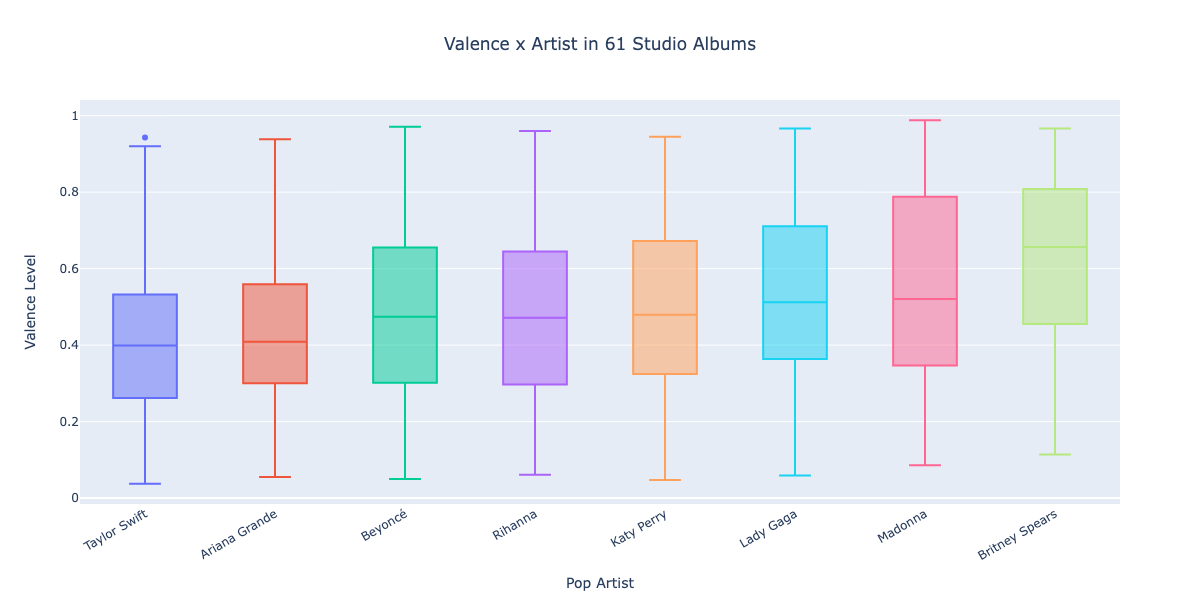

In [47]:
from IPython import display
display.Image('valence.png')

- The two more popular artist has the lower valenceboxplot.
- This means that at the moment the top 2 pop artists their songs are not to happy, they are more in the depressive or sad side, but people loves that this year.

In [48]:
# Adding new column named, Genre, all values will say Pop, on web scraping, didn't give me a genre, but I know is Pop
df_cleaned['Genre'] = 'Pop'

In [49]:
df_cleaned.head()

Name        Artists             Album  \
0                              Cruel Summer   Taylor Swift             Lover   
1  we can't be friends (wait for your love)  Ariana Grande  eternal sunshine   
2                                     Lover   Taylor Swift             Lover   
3                                 Anti-Hero   Taylor Swift         Midnights   
4                           the boy is mine  Ariana Grande  eternal sunshine   

  Release Date  popularity  danceability  energy  key  loudness  mode  ...  \
0   2019-08-23          96         0.552   0.702    9    -5.707     1  ...   
1   2024-03-08          95         0.645   0.663    5    -8.305     1  ...   
2   2019-08-23          90         0.359   0.543    7    -7.582     1  ...   
3   2022-10-21          89         0.637   0.643    4    -6.571     1  ...   
4   2024-03-08          89         0.796   0.623    7    -5.819     0  ...   

                       id                                   uri  \
0  1BxfuPKGuaTgP7aM0Bbdwr  spotify:track:1BxfuPKGuaTgP7aM0Bbdwr   
1  51ZQ1vr10ffzbwIjDCwqm4  spotify:track:51ZQ1vr10ffzbwIjDCwqm4   
2  1dGr1c8CrMLDpV6mPbImSI  spotify:track:1dGr1c8CrMLDpV6mPbImSI   
3  0V3wPSX9ygBnCm8psDIegu  spotify:track:0V3wPSX9ygBnCm8psDIegu   
4  0Lmbke3KNVFXtoH2mMSHCw  spotify:track:0Lmbke3KNVFXtoH2mMSHCw   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...   
1  https://api.spotify.com/v1/tracks/51ZQ1vr10ffz...   
2  https://api.spotify.com/v1/tracks/1dGr1c8CrMLD...   
3  https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...   
4  https://api.spotify.com/v1/tracks/0Lmbke3KNVFX...   

                                        analysis_url  time_signature  \
0  https://api.spotify.com/v1/audio-analysis/1Bxf...               4   
1  https://api.spotify.com/v1/audio-analysis/51ZQ...               4   
2  https://api.spotify.com/v1/audio-analysis/1dGr...               4   
3  https://api.spotify.com/v1/audio-analysis/0V3w...               4   
4  https://api.spotify.com/v1/audio-analysis/0Lmb...               4   

   Release Day Release Month Release Year duration_minutes Genre  
0           23             8         2019         2.973783   Pop  
1            8             3         2024         3.810650   Pop  
2           23             8         2019         3.688450   Pop  
3           21            10         2022         3.344833   Pop  
4            8             3         2024         2.894000   Pop  

[5 rows x 27 columns]

In [50]:
# Export the DataFrame to a new CSV file
df_cleaned.to_csv('df_pop_cleaned.csv', index=False)

In [51]:
df_cleaned.shape

(813, 27)

In [52]:
# 10 popular pop songs in thisn dataset
top_10 = df_cleaned.nlargest(10, 'popularity')

# Display the top 10 rows
print(top_10[['Name','Artists', 'popularity']])

                                       Name        Artists  popularity
0                              Cruel Summer   Taylor Swift          96
1  we can't be friends (wait for your love)  Ariana Grande          95
2                                     Lover   Taylor Swift          90
3                                 Anti-Hero   Taylor Swift          89
4                           the boy is mine  Ariana Grande          89
5                  intro (end of the world)  Ariana Grande          89
6                                  cardigan   Taylor Swift          88
7                            Don’t Blame Me   Taylor Swift          88
8                                       bye  Ariana Grande          88
9                                    august   Taylor Swift          87


### Correlation Matrix

In [53]:
# Select numerical columns
numerical_df= df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

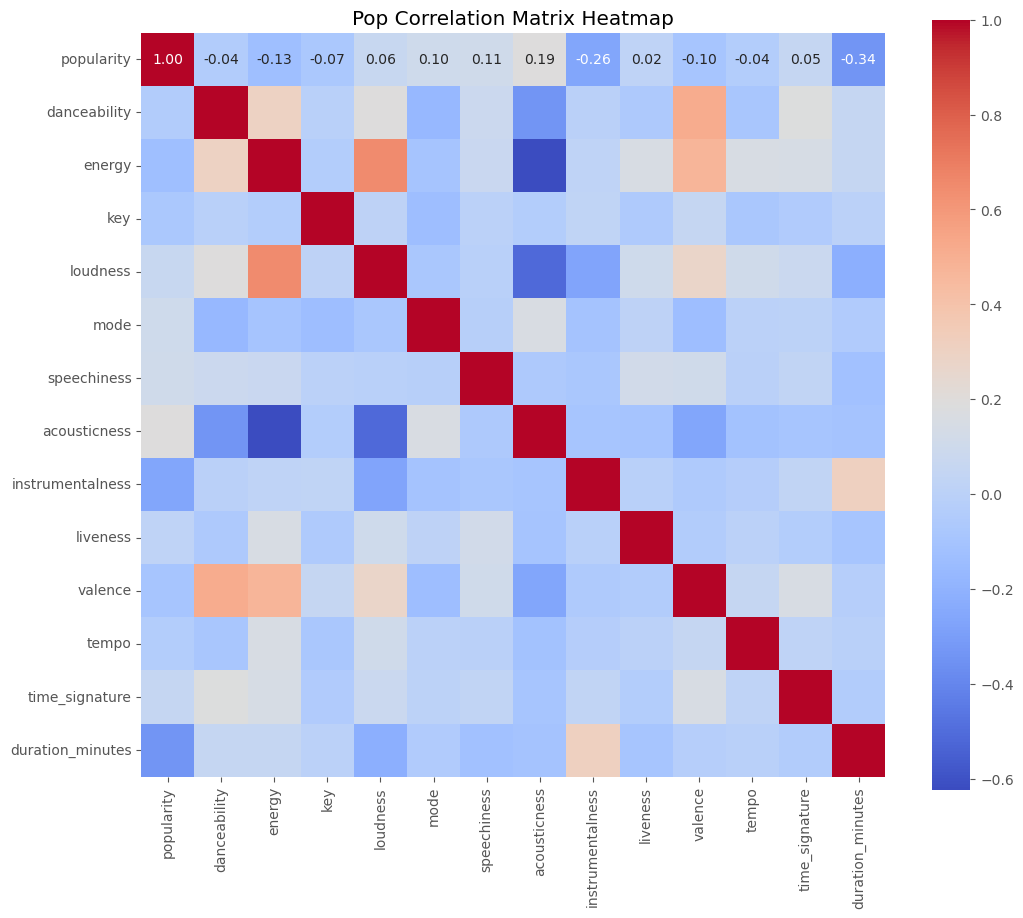

In [54]:
# Plot heatmap

# Create a new figure with a specified size (12 inches wide and 10 inches tall)
fig = plt.figure(figsize=(12, 10))

# Get the current Axes instance of the figure
ax = fig.gca()

# Plot the heatmap using seaborn's heatmap function
# correlation_matrix: the data to be plotted, assumed to be a correlation matrix
# annot=True: annotate each cell with the numeric value
# fmt=".2f": format for annotations, displaying two decimal places
# cmap='coolwarm': color map for the heatmap (cool to warm colors)
# ax=ax: plot the heatmap on the specified Axes instance
# annot_kws={"size": 10}: set the font size of the annotations to 10
# square=True: ensure the aspect ratio of the plot is square
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax, annot_kws={"size": 10}, square=True)

# Add a title to the plot
plt.title('Pop Correlation Matrix Heatmap')

# Display the plot
plt.show()

### I was not able to look at the individual percentages above in Jupyter Notebook, but I was able to achive this in Colab, so below is my correlation matrix in Colab

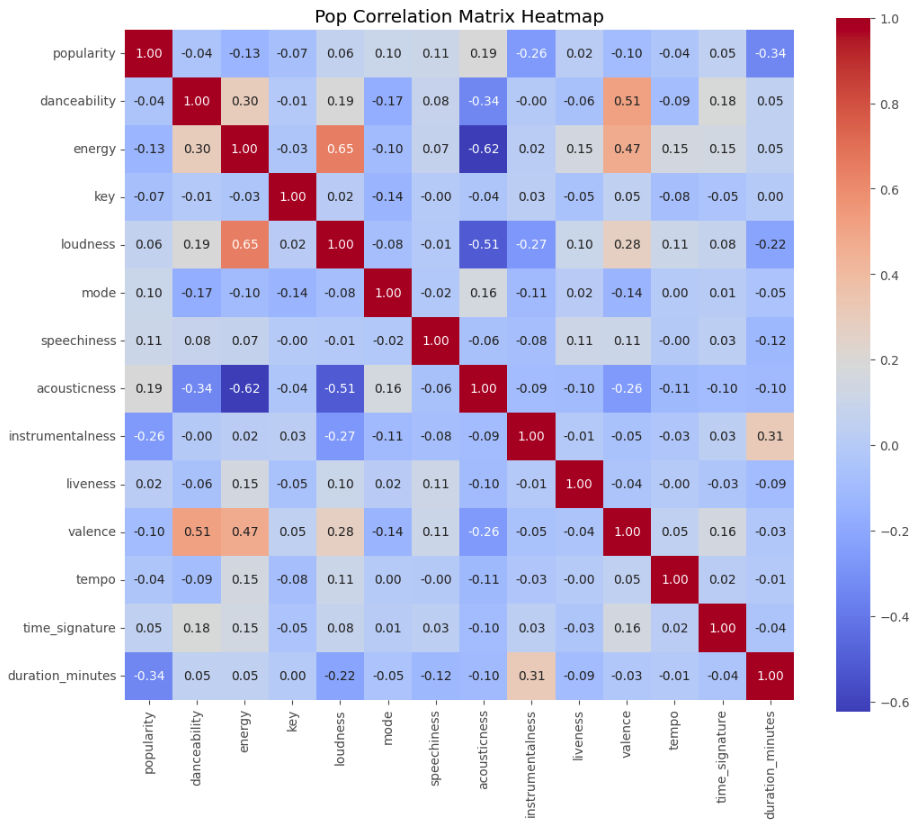

In [55]:
from IPython import display
display.Image('correlationmatrixpop.png')

- ### Which audio feature is more positive or negative correlated and with popularity?

Based on this correlation matrix.

- Negative correlated, the more the duration of the song, the less popularity score.
- Positive correlated is acousticness with 0.19, is low but that was the most positive correlated.

- A track with high acousticness typically features acoustic instruments like guitars, pianos, strings, or vocals recorded with minimal electronic manipulation.
- On the other hand, a track with low acousticness may rely heavily on synthesized sounds, electronic beats, or heavily processed vocals. 

### ONE HOT / DUMMIES

In [56]:
df_cleaned.shape

(813, 27)

In [57]:
# Create dummy variables for specified values in 'Artists'
key_name_dummies = pd.get_dummies(df_cleaned['Artists'], prefix='', prefix_sep='', columns=['Taylor Swift', 'Ariana Grande', 'Beyoncé',
                                                                                            'Rihanna', 'Katy Perry', 'Lady Gaga', 'Madonna',
                                                                                            'Britney Spears'], dtype='int')

In [58]:
# Concatenate the dummy variables with the original DataFrame
df_encoded = pd.concat([df_cleaned, key_name_dummies], axis=1)

In [59]:
df_encoded.shape

(813, 35)

In [60]:
df_encoded.head()

Name        Artists             Album  \
0                              Cruel Summer   Taylor Swift             Lover   
1  we can't be friends (wait for your love)  Ariana Grande  eternal sunshine   
2                                     Lover   Taylor Swift             Lover   
3                                 Anti-Hero   Taylor Swift         Midnights   
4                           the boy is mine  Ariana Grande  eternal sunshine   

  Release Date  popularity  danceability  energy  key  loudness  mode  ...  \
0   2019-08-23          96         0.552   0.702    9    -5.707     1  ...   
1   2024-03-08          95         0.645   0.663    5    -8.305     1  ...   
2   2019-08-23          90         0.359   0.543    7    -7.582     1  ...   
3   2022-10-21          89         0.637   0.643    4    -6.571     1  ...   
4   2024-03-08          89         0.796   0.623    7    -5.819     0  ...   

   duration_minutes  Genre  Ariana Grande  Beyoncé  Britney Spears  \
0          2.973783    Pop              0        0               0   
1          3.810650    Pop              1        0               0   
2          3.688450    Pop              0        0               0   
3          3.344833    Pop              0        0               0   
4          2.894000    Pop              1        0               0   

   Katy Perry Lady Gaga Madonna Rihanna Taylor Swift  
0           0         0       0       0            1  
1           0         0       0       0            0  
2           0         0       0       0            1  
3           0         0       0       0            1  
4           0         0       0       0            0  

[5 rows x 35 columns]

### Dataset ready to start a model

# Linear Regression

In [61]:
import sklearn as skl
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [62]:
# Feature matrix and target vector respectively
X = df_encoded.select_dtypes(['float', 'int'])
y = df_encoded['popularity']

In [63]:
X = X.drop(columns=['popularity'])

In [64]:
# popularity is gone 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      813 non-null    float64
 1   energy            813 non-null    float64
 2   key               813 non-null    int64  
 3   loudness          813 non-null    float64
 4   mode              813 non-null    int64  
 5   speechiness       813 non-null    float64
 6   acousticness      813 non-null    float64
 7   instrumentalness  813 non-null    float64
 8   liveness          813 non-null    float64
 9   valence           813 non-null    float64
 10  tempo             813 non-null    float64
 11  time_signature    813 non-null    int64  
 12  Release Day       813 non-null    int32  
 13  Release Month     813 non-null    int32  
 14  Release Year      813 non-null    int32  
 15  duration_minutes  813 non-null    float64
 16  Ariana Grande     813 non-null    int64  
 1

### Split

In [65]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scale the data 

In [66]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
# Define a list of alpha values to try for Lasso and Ridge regression
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

In [68]:
# Store results
results = []

### Linear Regression

In [69]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_pred = linear_reg.predict(X_test_scaled)
linear_r2 = r2_score(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mape = np.mean(np.abs((y_test - linear_pred) / y_test)) * 100

results.append({
    'Model': 'Linear Regression',
    'R2 Score': linear_r2,
    'MSE': linear_mse,
    'MAPE': linear_mape
})

## Regularization (L1-L2)

### Lasso

In [70]:
# Initialize Lasso model

In [71]:
# Lasso Regression
for alpha in alpha_values:
    lasso = Lasso(alpha=0.1, max_iter=1000, random_state=42) 
    lasso.fit(X_train_scaled, y_train)
    lasso_pred = lasso.predict(X_test_scaled)
    lasso_r2 = r2_score(y_test, lasso_pred)
    lasso_mse = mean_squared_error(y_test, lasso_pred)
    lasso_mape = np.mean(np.abs((y_test - lasso_pred) / y_test)) * 100

    results.append({
        'Model': f'Lasso (alpha={alpha})',
        'R2 Score': lasso_r2,
        'MSE': lasso_mse,
        'MAPE': lasso_mape
    })

### Ridge

In [72]:
# Ridge Regression
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_pred = ridge.predict(X_test_scaled)
    ridge_r2 = r2_score(y_test, ridge_pred)
    ridge_mse = mean_squared_error(y_test, ridge_pred)
    ridge_mape = np.mean(np.abs((y_test - ridge_pred) / y_test)) * 100
    
    results.append({
        'Model': f'Ridge (alpha={alpha})',
        'R2 Score': ridge_r2,
        'MSE': ridge_mse,
        'MAPE': ridge_mape
    })


In [73]:
# Convert results to DataFrame for easier visualization
results_pop_df_one = pd.DataFrame(results)

# Print results
print(results_pop_df_one)

                  Model  R2 Score         MSE       MAPE
0     Linear Regression  0.593741  135.357652  24.594017
1   Lasso (alpha=0.001)  0.589534  136.759378  24.947554
2    Lasso (alpha=0.01)  0.589534  136.759378  24.947554
3     Lasso (alpha=0.1)  0.589534  136.759378  24.947554
4       Lasso (alpha=1)  0.589534  136.759378  24.947554
5      Lasso (alpha=10)  0.589534  136.759378  24.947554
6     Lasso (alpha=100)  0.589534  136.759378  24.947554
7   Ridge (alpha=0.001)  0.591976  135.945755  24.554602
8    Ridge (alpha=0.01)  0.591974  135.946302  24.554725
9     Ridge (alpha=0.1)  0.591958  135.951770  24.555960
10      Ridge (alpha=1)  0.591793  136.006477  24.568256
11     Ridge (alpha=10)  0.590147  136.554930  24.686363
12    Ridge (alpha=100)  0.573919  141.961851  25.674963


# Lasso Regression

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.103e+02, tolerance: 1.493e+01

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.073e+02, tolerance: 1.637e+01



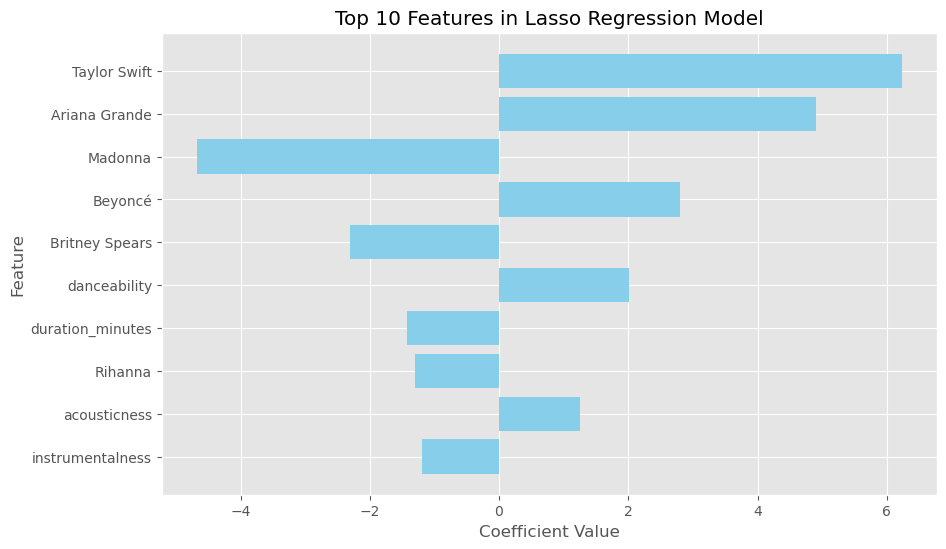

Test Score: 0.5895336353430001
MSE Score: 136.7593777257311


In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with StandardScaler and Lasso regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'lasso__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values to search over
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate test score
test_score = best_model.score(X_test, y_test)

# Get coefficients and corresponding feature names from best model
coefficients = best_model.named_steps['lasso'].coef_
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 coefficients
top_10_coefficients = coefficients_df.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_coefficients['Feature'], top_10_coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features in Lasso Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.show()

print("Test Score:", test_score)
y_pred = best_model.predict(X_test)

# Calculate MSE score
mse = mean_squared_error(y_test, y_pred)

# Print scores
print("MSE Score:", mse)

- R squared 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.103e+02, tolerance: 1.493e+01

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.073e+02, tolerance: 1.637e+01



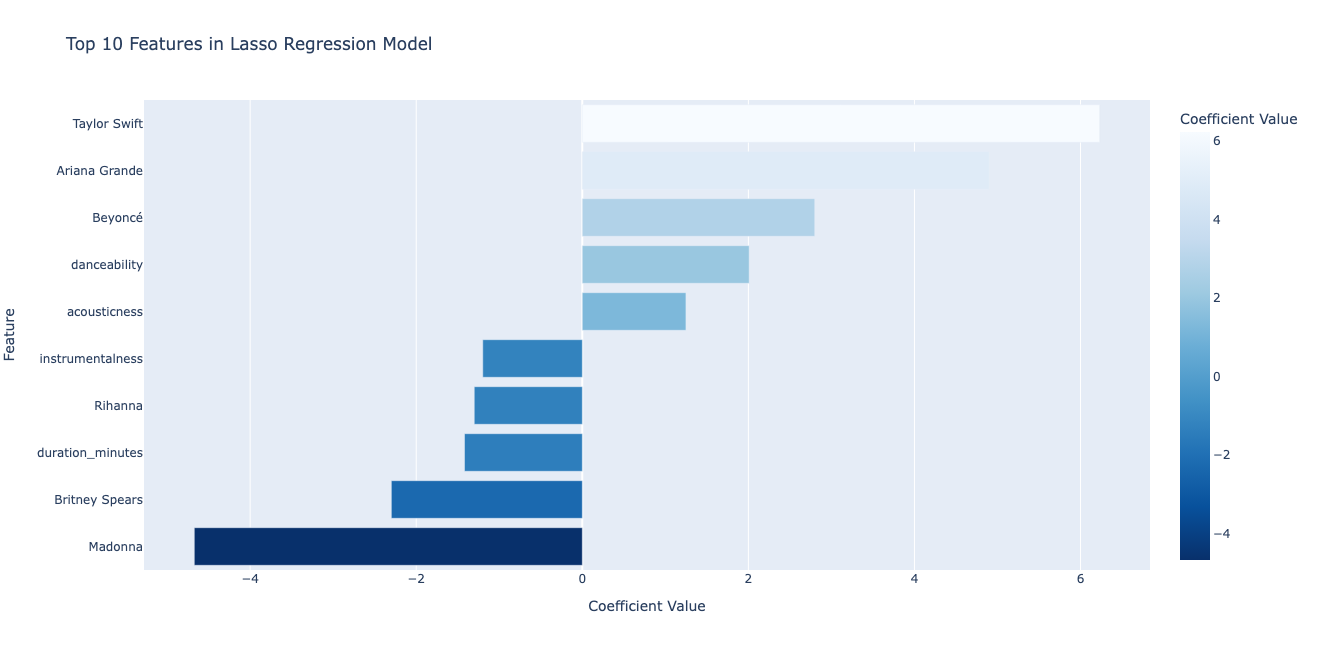

Test Score: 0.5895336353430001
MSE Score: 136.7593777257311


In [75]:
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with StandardScaler and Lasso regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'lasso__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values to search over
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate test score
test_score = best_model.score(X_test, y_test)

# Get coefficients and corresponding feature names from best model
coefficients = best_model.named_steps['lasso'].coef_
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 coefficients
top_10_coefficients = coefficients_df.head(10)

# Plotting using Plotly Express
fig = px.bar(top_10_coefficients, 
             x='Coefficient', 
             y='Feature', 
             orientation='h', 
             title='Top 10 Features in Lasso Regression Model',
             labels={'Coefficient': 'Coefficient Value', 'Feature': 'Feature'},
             color='Coefficient',
             color_continuous_scale='Blues_r')

fig.update_yaxes(categoryorder='total ascending')  # Ensure features are ordered by coefficient value
fig.update_layout(height=650, width=1000)  # Adjust the size of the chart

fig.show()

# Print test score
print("Test Score:", test_score)

# Predict using the best model
y_pred = best_model.predict(X_test)

# Calculate MSE score
mse = mean_squared_error(y_test, y_pred)

# Print scores
print("MSE Score:", mse)


# Ridge regression

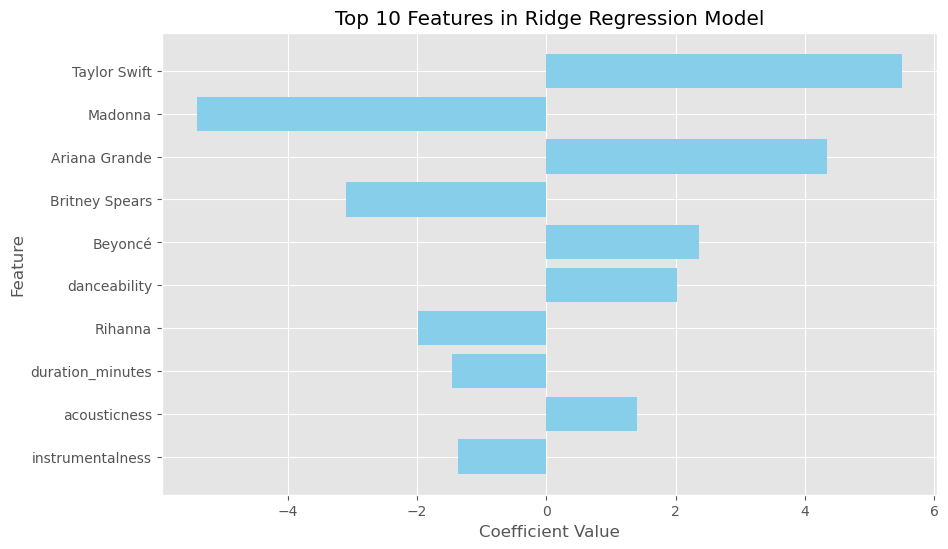

Test Score: 0.590147260697486
MSE Score: 136.55492973958164


In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with StandardScaler and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values to search over
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate test score
test_score = best_model.score(X_test, y_test)

# Get coefficients and corresponding feature names from best model
coefficients = best_model.named_steps['ridge'].coef_
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 coefficients
top_10_coefficients = coefficients_df.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_coefficients['Feature'], top_10_coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features in Ridge Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.show()

print("Test Score:", test_score)
y_pred = best_model.predict(X_test)

# Calculate MSE score
mse = mean_squared_error(y_test, y_pred)

# Print scores
print("MSE Score:", mse)

- Ridge is better score than Lasso's score

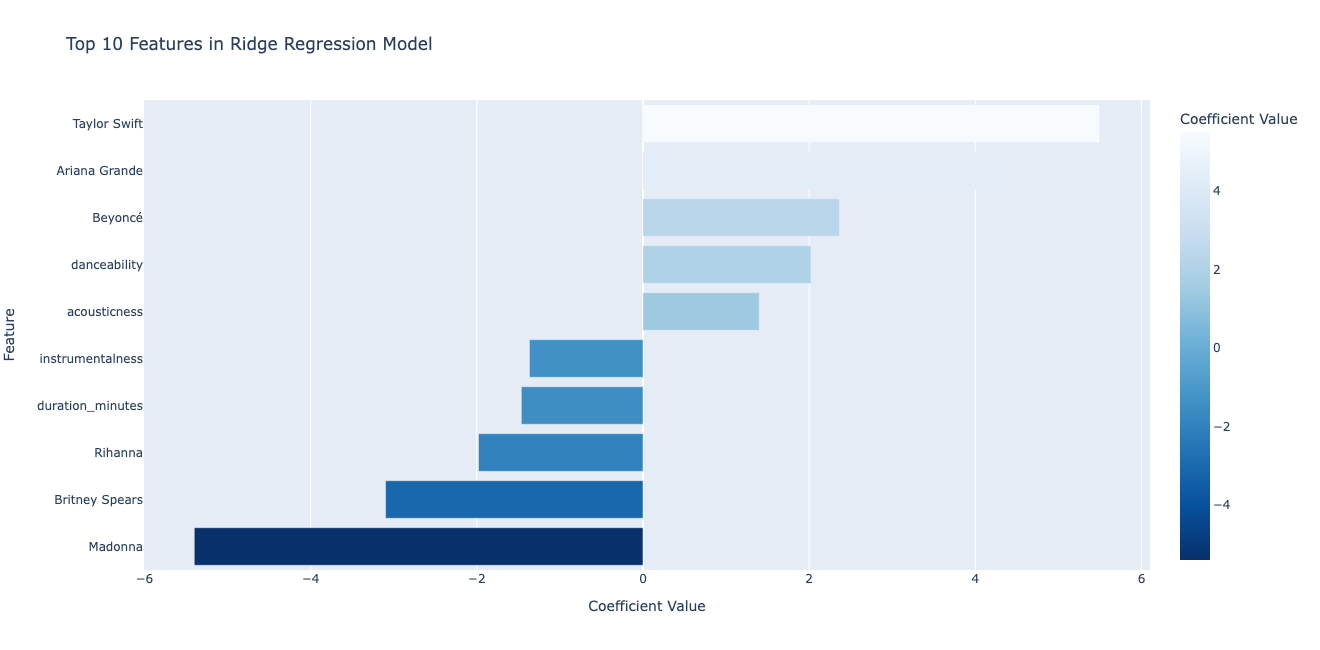

Test Score: 0.590147260697486
MSE Score: 136.55492973958164


In [77]:
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with StandardScaler and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values to search over
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate test score
test_score = best_model.score(X_test, y_test)

# Get coefficients and corresponding feature names from best model
coefficients = best_model.named_steps['ridge'].coef_
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 coefficients
top_10_coefficients = coefficients_df.head(10)

# Plotting using Plotly Express
fig = px.bar(top_10_coefficients, 
             x='Coefficient', 
             y='Feature', 
             orientation='h', 
             title='Top 10 Features in Ridge Regression Model',
             labels={'Coefficient': 'Coefficient Value', 'Feature': 'Feature'},
             color='Coefficient',
             color_continuous_scale='Blues_r')

fig.update_yaxes(categoryorder='total ascending')  # Ensure features are ordered by coefficient value
fig.update_layout(height=650, width=1000)  # Adjust the size of the chart

fig.show()

# Print test score
print("Test Score:", test_score)

# Predict using the best model
y_pred = best_model.predict(X_test)

# Calculate MSE score
mse = mean_squared_error(y_test, y_pred)

# Print scores
print("MSE Score:", mse)


# Random Forest Regressor

In [78]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor 

In [79]:
estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA(n_components=16)),
              ('model', RandomForestRegressor())]

pipe = Pipeline(estimators)

- Notes to comprehend more in detail the code below:
- `Max depth` in a decision tree is like setting a limit on how deep you can explore each path in a maze.
- `min_samples_leaf` sets the minimum number of samples required to be at a leaf node. 

**Analogy**: Imagine each leaf in a tree as a group of people who share similar characteristics.

- the minimum number of samples required to split an internal node further. 

**Analogy**: Picture the decision tree as a game where you decide whether to keep dividing a group based on how many players are left. `min_samples_split` sets the minimum number of players required to keep dividing a group into smaller groups.

In [80]:
param_grid = [{'model__max_depth': [4, 8, 10], # Options Yes or NO. setting a limit on how deep
               'model__min_samples_leaf':[4, 8, 12], # This is size of leaf, small the leaf we can have Overfitting. Note: There's no Regularizarion on Decision Tree.
               'model__min_samples_split':[4,6, 8]} # This is also related to the size of leaf.
]

grid = GridSearchCV(pipe, param_grid, cv=2,verbose=6, n_jobs=2)

fittedgrid = grid.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


In [81]:
# Best estimator object
fittedgrid.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('reduce_dim', PCA(n_components=16)),
                ('model',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=4,
                                       min_samples_split=4))])

In [82]:
# Best estimator object
fittedgrid.best_estimator_.steps[2][1].feature_importances_

array([0.0738826 , 0.28469144, 0.06072585, 0.03529486, 0.02281769,
       0.12840378, 0.02434693, 0.13571427, 0.04108717, 0.03093678,
       0.0195725 , 0.03016714, 0.03745269, 0.02979056, 0.02524097,
       0.01987475])

- Cant see name of feature.

In [83]:
from sklearn.feature_selection import SelectFromModel

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestRegressor())),
    ('regressor', RandomForestRegressor())
])

# Define the parameters for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10]
}


# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract the best estimator
best_estimator = grid_search.best_estimator_

# 
feature_importances = best_estimator.named_steps['regressor'].feature_importances_

# Get indices of the most important features
most_important_indices = feature_importances.argsort()[-5:][::-1]  # Change 5 to the number of features you want to extract

# Get original feature names
original_feature_names = [f'Feature_{i+1}' for i in range(X_train.shape[1])]  # Assuming feature names are Feature_1, Feature_2, etc.

# Map indices to feature names
most_important_features = [original_feature_names[index] for index in most_important_indices]

# Print the most important features
print("Most important features:")
for feature_name, importance in zip(most_important_features, feature_importances[most_important_indices]):
    print(f"{feature_name}: Importance {importance}")

[CV 1/2] END model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=4;, score=0.403 total time=   0.1s
[CV 1/2] END model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.407 total time=   0.1s
[CV 1/2] END model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=8;, score=0.410 total time=   0.1s
[CV 1/2] END model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=4;, score=0.406 total time=   0.1s
[CV 1/2] END model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6;, score=0.410 total time=   0.1s
[CV 1/2] END model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=8;, score=0.416 total time=   0.1s
[CV 1/2] END model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=4;, score=0.409 total time=   0.1s
[CV 1/2] END model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=6;, score=0.400 total time=   0.1s
[CV 1/2] END model__max_depth=4, model

- Tryng to see the feature.

In [84]:
# Best hyperparameters
fittedgrid.best_params_

{'model__max_depth': 10,
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 4}

In [85]:
# Scoring from my pipeline using GridsearchCV
# Getting the best score from my pipeline using GridSearchCV
fittedgrid.score(X_test_scaled, y_test)

0.5915336898180905

In [86]:
### Data frame with only where popularity are => 60 or <=100
### No modeling here
### Just code ready if needed it

In [87]:
# Read data from CSV file
# df = pd.read_csv("  .csv")

In [88]:
#df.shape

In [89]:
# Drop rows where 'popularity' value is less than 60
#df_filtered = df[df['popularity'] >= 60]

# Drop rows where 'popularity' value is greater than 100
#df_filtered = df_filtered[df_filtered['popularity'] <= 100]

# If you want to reset the index after filtering
#df_filtered.reset_index(drop=True, inplace=True)

# Now, df_filtered contains only the rows where 'popularity' value is between 60 and 100


In [90]:
#df_filtered.shape

In [91]:
#df_filtered.head()